In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx")


In [5]:

# Convertir fechas
df["MES"] = pd.to_datetime(df["MES"])
df = df.sort_values("MES")

In [6]:
# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[prov_cols])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_data, window_size)

# Redimensionar X: (samples, time_steps, features)
X = X.reshape((X.shape[0], window_size, len(prov_cols)))

# --- 4. Modelo LSTM multisalida ---
model = Sequential([
    LSTM(100, activation='relu', input_shape=(window_size, len(prov_cols))),
    Dense(len(prov_cols))  # salida por cada provincia
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=32)

# --- 5. Predicción de 120 meses hacia el futuro ---
last_seq = scaled_data[-window_size:]
input_seq = last_seq.reshape(1, window_size, len(prov_cols))

future_preds = []

for _ in range(120):
    next_pred = model.predict(input_seq)[0]
    future_preds.append(next_pred)
    input_seq = np.append(input_seq[:, 1:, :], [[next_pred]], axis=1)

# Desnormalizar predicciones
future_preds_inv = scaler.inverse_transform(future_preds)

# Crear DataFrame con fechas futuras
last_date = df["MES"].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=120, freq='MS')
forecast_df = pd.DataFrame(future_preds_inv, columns=prov_cols)
forecast_df.insert(0, "MES", future_dates)

# --- 6. (Opcional) Graficar una provincia ---


NameError: name 'prov_cols' is not defined

In [7]:
df.info

<bound method DataFrame.info of             MES  COSTE/M2          AREA
765  2007-12-01       9.6      MARBELLA
862  2008-02-01      10.4      MARBELLA
891  2008-03-01      10.6      MARBELLA
619  2008-04-01       8.9   BENALMADENA
785  2008-04-01       9.7      MARBELLA
...         ...       ...           ...
1142 2025-04-01      16.0   BENALMADENA
1161 2025-04-01      16.5  TORREMOLINOS
1191 2025-04-01      18.5      MARBELLA
1181 2025-04-01      17.4      ESTEPONA
1163 2025-04-01      16.6        CENTRO

[1193 rows x 3 columns]>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 765 to 1163
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   MES       1193 non-null   datetime64[ns]
 1   COSTE/M2  1193 non-null   float64       
 2   AREA      1193 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 37.3+ KB


In [9]:
df_casas= pd.get_dummies(df, columns=['AREA'])

In [10]:
df_casas.head(5)

,MES,COSTE/M2,AREA_BENALMADENA,AREA_CENTRO,AREA_ESTEPONA,AREA_FUENGIROLA,AREA_MARBELLA,AREA_TORREMOLINOS
765,2007-12-01,9.6,False,False,False,False,True,False
862,2008-02-01,10.4,False,False,False,False,True,False
891,2008-03-01,10.6,False,False,False,False,True,False
619,2008-04-01,8.9,True,False,False,False,False,False
785,2008-04-01,9.7,False,False,False,False,True,False


In [14]:
import pandas as pd 
import matplotlib.pyplot as pd
import seaborn as sns

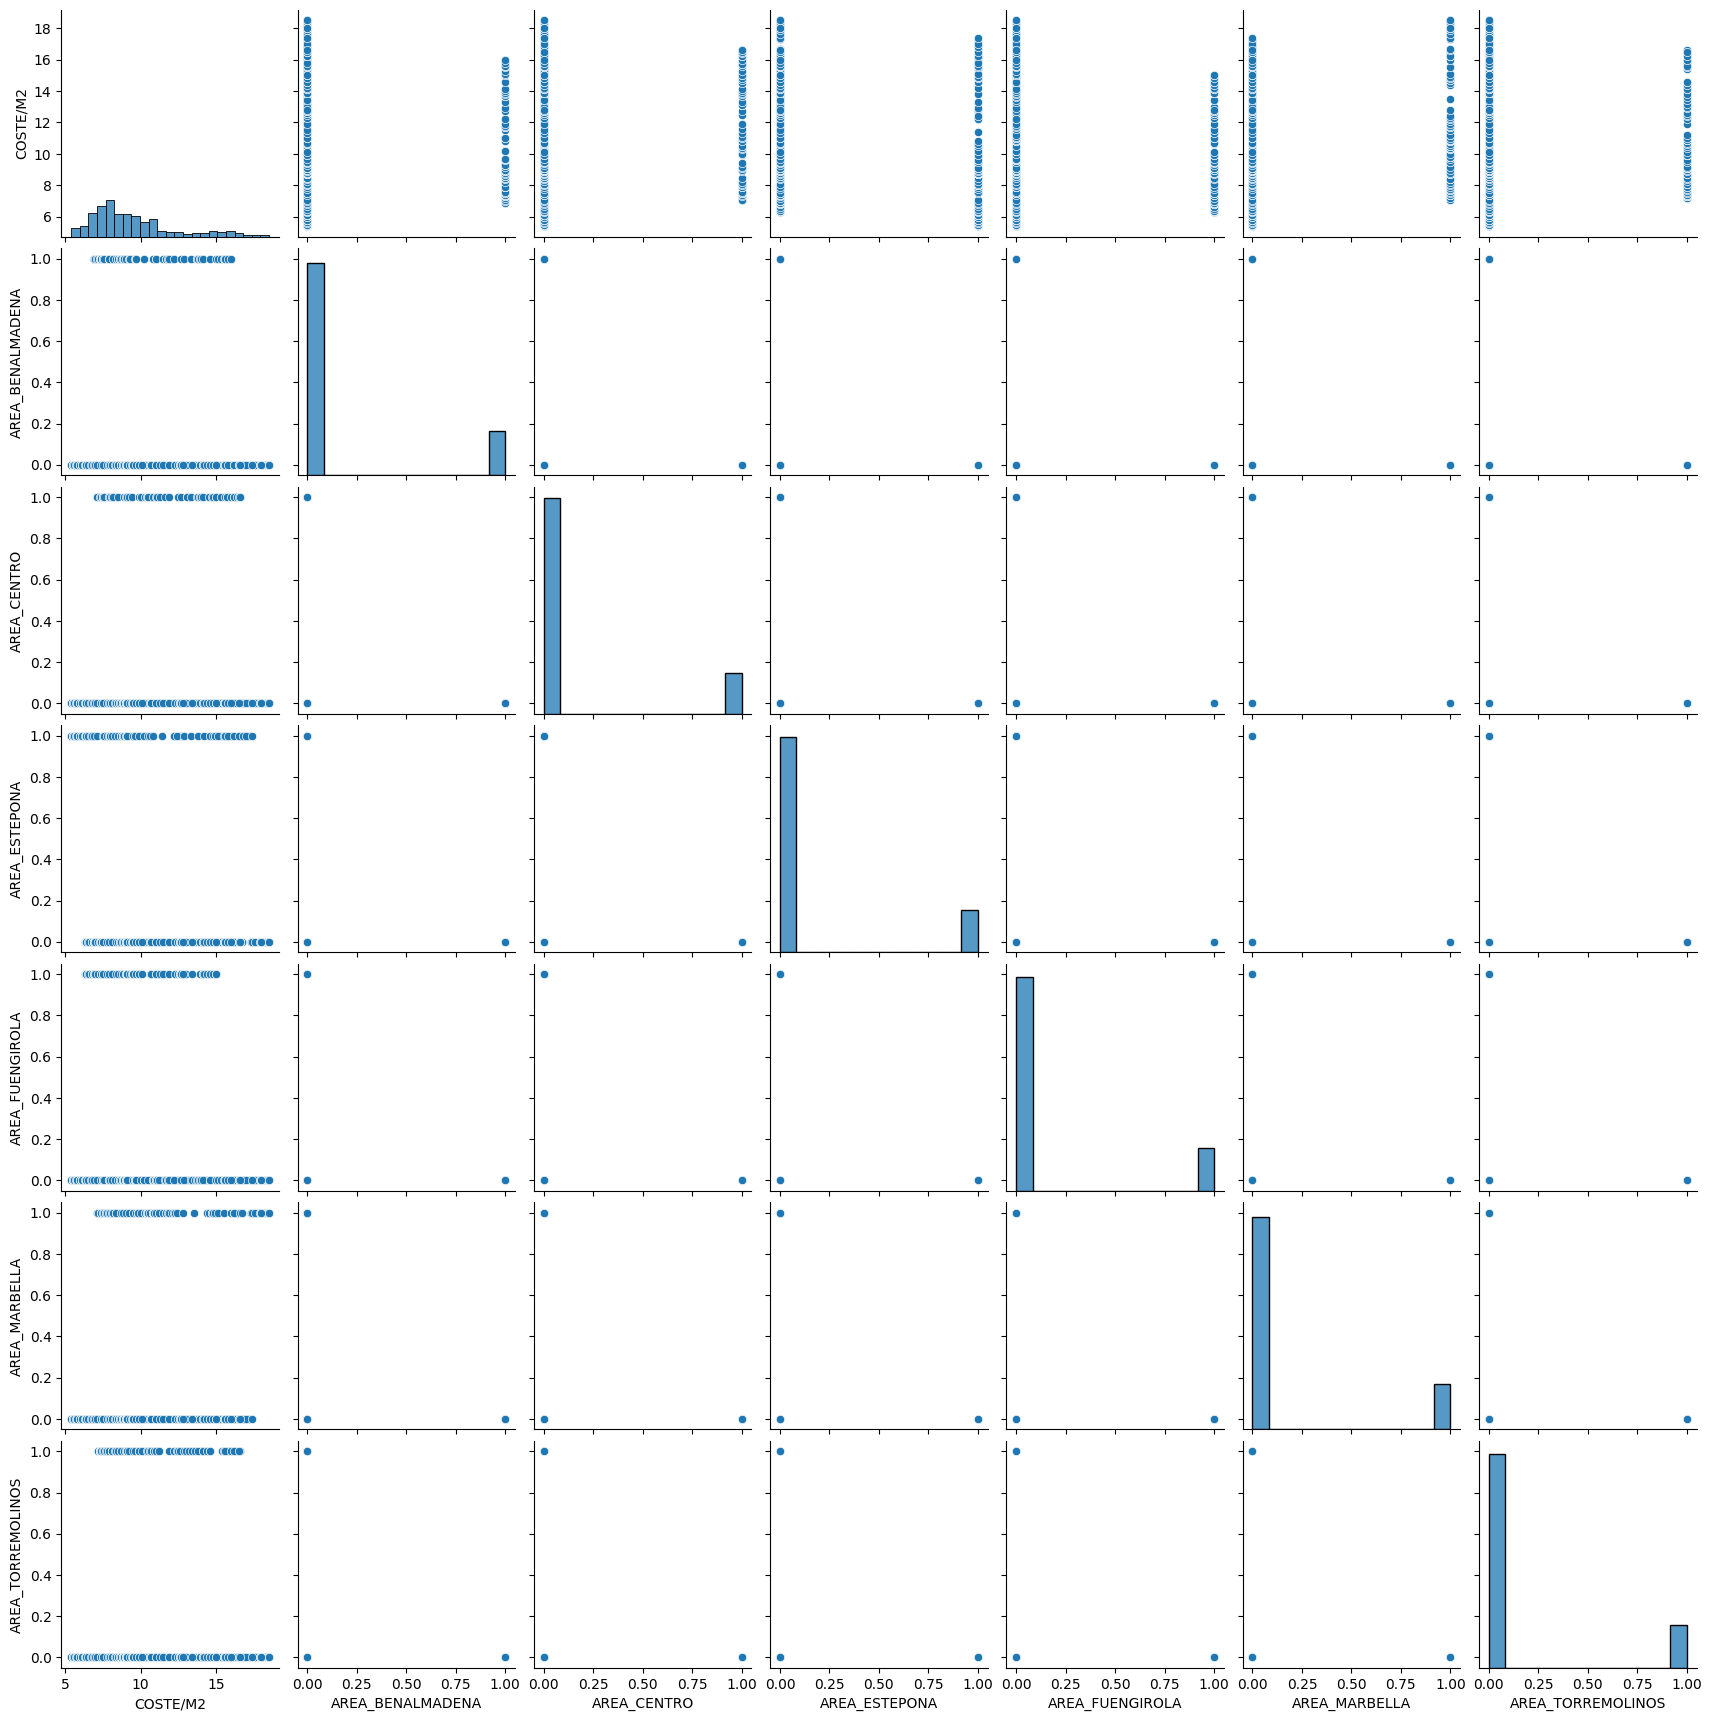

In [15]:
pair_plot = sns.pairplot(df_casas)
plt.show()

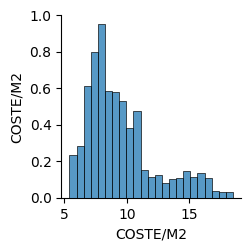

In [3]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx")

# Convertir fechas
df["MES"] = pd.to_datetime(df["MES"])
df = df.sort_values("MES")
pair_plot = sns.pairplot(df)
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar archivo
df1 = pd.read_excel("prueba lstm.xlsx")
print(df1.head())

         MES  COSTE/M2      AREA
0 2014-03-01       5.4  ESTEPONA
1 2014-02-01       5.4  ESTEPONA
2 2014-01-01       5.4  ESTEPONA
3 2014-06-01       5.5  ESTEPONA
4 2014-05-01       5.5  ESTEPONA


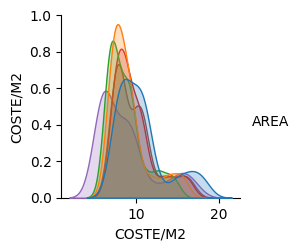

In [4]:
pair_plot = sns.pairplot(df, hue="AREA", diag_kind="kde")
plt.show()

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [18]:
# --- 1. Cargar y limpiar datos ---
df_bena = pd.read_excel("prueba_bena.xlsx", index_col= False)

In [19]:
df_bena


,MES,COSTE/M2,AREA
0,2015-12-01,6.9,BENALMADENA
1,2015-11-01,6.9,BENALMADENA
2,2015-06-01,6.9,BENALMADENA
3,2015-03-01,6.9,BENALMADENA
4,2015-02-01,6.9,BENALMADENA
...,...,...,...
200,2025-01-01,15.6,BENALMADENA
201,2024-12-01,15.6,BENALMADENA
202,2024-07-01,15.7,BENALMADENA
203,2025-03-01,15.8,BENALMADENA


In [27]:
# Asegúrate de que 'Año' sea tipo int (¡no datetime!)
df['MES'] = df['MES'].astype(int)


In [28]:
# Convertimos el año a una variable numérica para la regresión
X = df[['MES']]
y = df['COSTE/M2']

# Modelo polinómico (grado 2 o 3)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

# Predicciones
poly_preds = poly_model.predict(future_years)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Año: 2025, Predicción valor m²: $-11.96
Año: 2026, Predicción valor m²: $-11.96
Año: 2027, Predicción valor m²: $-11.96
Año: 2028, Predicción valor m²: $-11.96
Año: 2029, Predicción valor m²: $-11.96
Año: 2030, Predicción valor m²: $-11.96
Año: 2031, Predicción valor m²: $-11.96
Año: 2032, Predicción valor m²: $-11.96
Año: 2033, Predicción valor m²: $-11.96


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


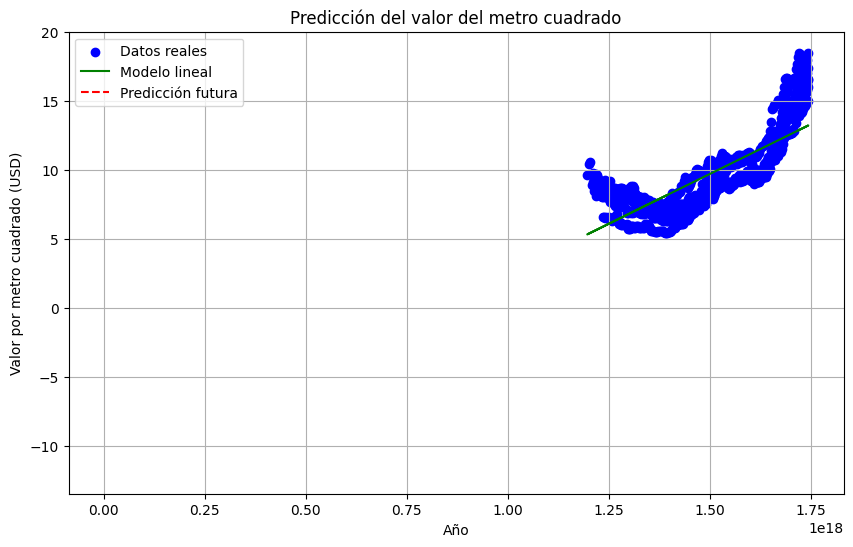

In [29]:
# Predecimos los próximos 10 años
future_years = np.array(range(2025, 2034)).reshape(-1, 1)
predictions = model.predict(future_years)

# Mostramos resultados
for year, value in zip(future_years.flatten(), predictions):
    print(f"Año: {year}, Predicción valor m²: ${value:.2f}")

# Graficamos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, model.predict(X), color='green', label='Modelo lineal')
plt.plot(future_years, predictions, color='red', linestyle='--', label='Predicción futura')
plt.xlabel('Año')
plt.ylabel('Valor por metro cuadrado (USD)')
plt.title('Predicción del valor del metro cuadrado')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\734547493.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


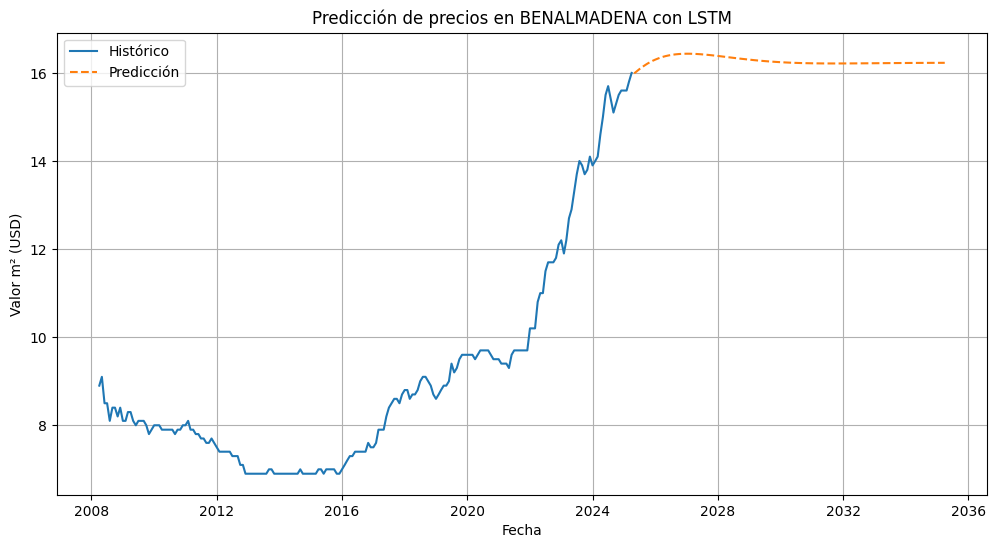

2025-05: $15.99
2025-06: $16.04
2025-07: $16.09
2025-08: $16.13
2025-09: $16.17
2025-10: $16.21
2025-11: $16.24
2025-12: $16.27
2026-01: $16.30
2026-02: $16.33
2026-03: $16.35
2026-04: $16.37
2026-05: $16.38
2026-06: $16.39
2026-07: $16.41
2026-08: $16.42
2026-09: $16.42
2026-10: $16.43
2026-11: $16.43
2026-12: $16.43
2027-01: $16.44
2027-02: $16.44
2027-03: $16.43
2027-04: $16.43
2027-05: $16.43
2027-06: $16.43
2027-07: $16.42
2027-08: $16.42
2027-09: $16.41
2027-10: $16.40
2027-11: $16.40
2027-12: $16.39
2028-01: $16.39
2028-02: $16.38
2028-03: $16.37
2028-04: $16.36
2028-05: $16.36
2028-06: $16.35
2028-07: $16.34
2028-08: $16.34
2028-09: $16.33
2028-10: $16.32
2028-11: $16.31
2028-12: $16.31
2029-01: $16.30
2029-02: $16.30
2029-03: $16.29
2029-04: $16.28
2029-05: $16.28
2029-06: $16.27
2029-07: $16.27
2029-08: $16.26
2029-09: $16.26
2029-10: $16.25
2029-11: $16.25
2029-12: $16.25
2030-01: $16.24
2030-02: $16.24
2030-03: $16.24
2030-04: $16.23
2030-05: $16.23
2030-06: $16.23
2030-07:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- 1. Cargar y limpiar datos ---
df_bena = pd.read_excel("prueba_bena.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'BENALMADENA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [40]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_benalmadena.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_benalmadena.xlsx'")

Predicciones exportadas a 'predicciones_benalmadena.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7736\2274568912.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


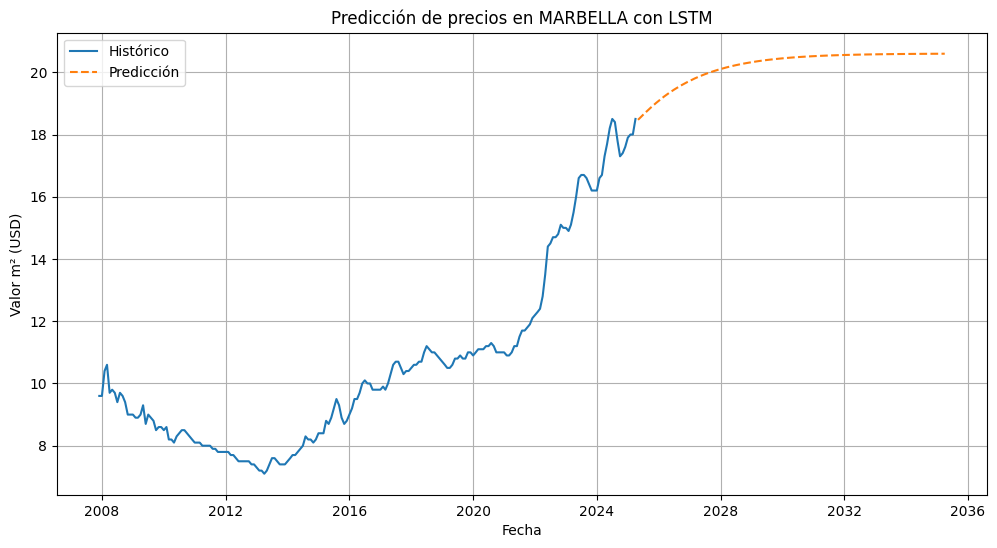

2025-05: $18.47
2025-06: $18.55
2025-07: $18.64
2025-08: $18.72
2025-09: $18.79
2025-10: $18.87
2025-11: $18.94
2025-12: $19.01
2026-01: $19.08
2026-02: $19.15
2026-03: $19.21
2026-04: $19.27
2026-05: $19.33
2026-06: $19.39
2026-07: $19.44
2026-08: $19.49
2026-09: $19.54
2026-10: $19.59
2026-11: $19.64
2026-12: $19.68
2027-01: $19.72
2027-02: $19.76
2027-03: $19.80
2027-04: $19.84
2027-05: $19.87
2027-06: $19.91
2027-07: $19.94
2027-08: $19.97
2027-09: $20.00
2027-10: $20.03
2027-11: $20.05
2027-12: $20.08
2028-01: $20.10
2028-02: $20.13
2028-03: $20.15
2028-04: $20.17
2028-05: $20.19
2028-06: $20.21
2028-07: $20.23
2028-08: $20.25
2028-09: $20.26
2028-10: $20.28
2028-11: $20.29
2028-12: $20.31
2029-01: $20.32
2029-02: $20.34
2029-03: $20.35
2029-04: $20.36
2029-05: $20.37
2029-06: $20.38
2029-07: $20.39
2029-08: $20.40
2029-09: $20.41
2029-10: $20.42
2029-11: $20.43
2029-12: $20.44
2030-01: $20.45
2030-02: $20.45
2030-03: $20.46
2030-04: $20.47
2030-05: $20.47
2030-06: $20.48
2030-07:

In [ ]:

# --- 1. Cargar y limpiar datos ---
df_marbella= pd.read_excel("prueba lstm.xlsx") 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'MARBELLA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 190  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=200, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})



print("Predicciones exportadas a 'predicciones_benalmadena.xlsx'")

In [ ]:
# Guardar a Excel
df_predicciones.to_excel('predicciones_marbella.xlsx', index=False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18220\3469106495.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


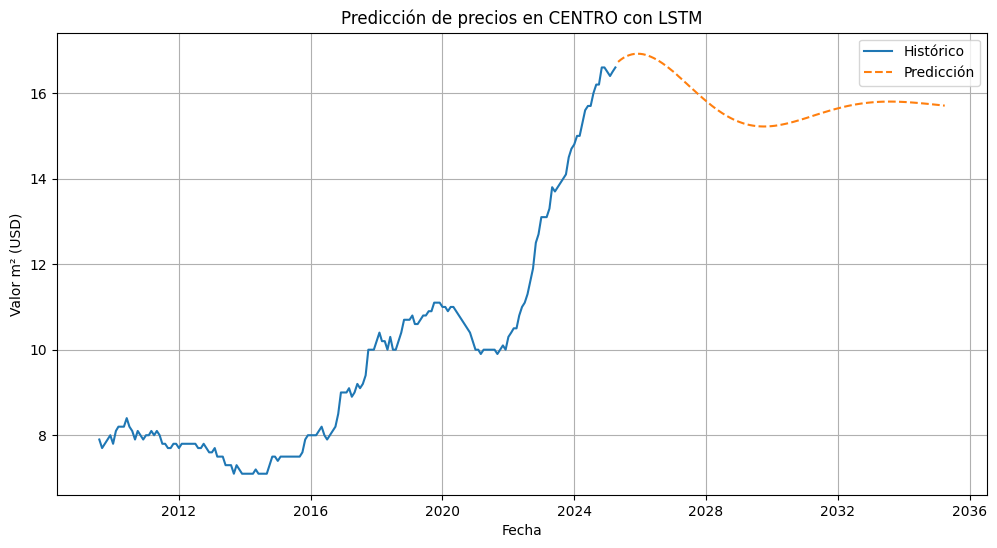

2025-05: $16.73
2025-06: $16.78
2025-07: $16.83
2025-08: $16.86
2025-09: $16.89
2025-10: $16.91
2025-11: $16.92
2025-12: $16.92
2026-01: $16.92
2026-02: $16.91
2026-03: $16.89
2026-04: $16.87
2026-05: $16.85
2026-06: $16.82
2026-07: $16.78
2026-08: $16.75
2026-09: $16.70
2026-10: $16.66
2026-11: $16.61
2026-12: $16.56
2027-01: $16.51
2027-02: $16.45
2027-03: $16.40
2027-04: $16.34
2027-05: $16.28
2027-06: $16.22
2027-07: $16.16
2027-08: $16.10
2027-09: $16.04
2027-10: $15.99
2027-11: $15.93
2027-12: $15.87
2028-01: $15.82
2028-02: $15.76
2028-03: $15.71
2028-04: $15.66
2028-05: $15.62
2028-06: $15.57
2028-07: $15.53
2028-08: $15.49
2028-09: $15.45
2028-10: $15.42
2028-11: $15.38
2028-12: $15.36
2029-01: $15.33
2029-02: $15.31
2029-03: $15.29
2029-04: $15.27
2029-05: $15.25
2029-06: $15.24
2029-07: $15.23
2029-08: $15.23
2029-09: $15.22
2029-10: $15.22
2029-11: $15.22
2029-12: $15.22
2030-01: $15.23
2030-02: $15.24
2030-03: $15.25
2030-04: $15.26
2030-05: $15.27
2030-06: $15.28
2030-07:

In [4]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'CENTRO'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [7]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_centro.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_centro.xlsx'")

Predicciones exportadas a 'predicciones_centro.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18220\582373986.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


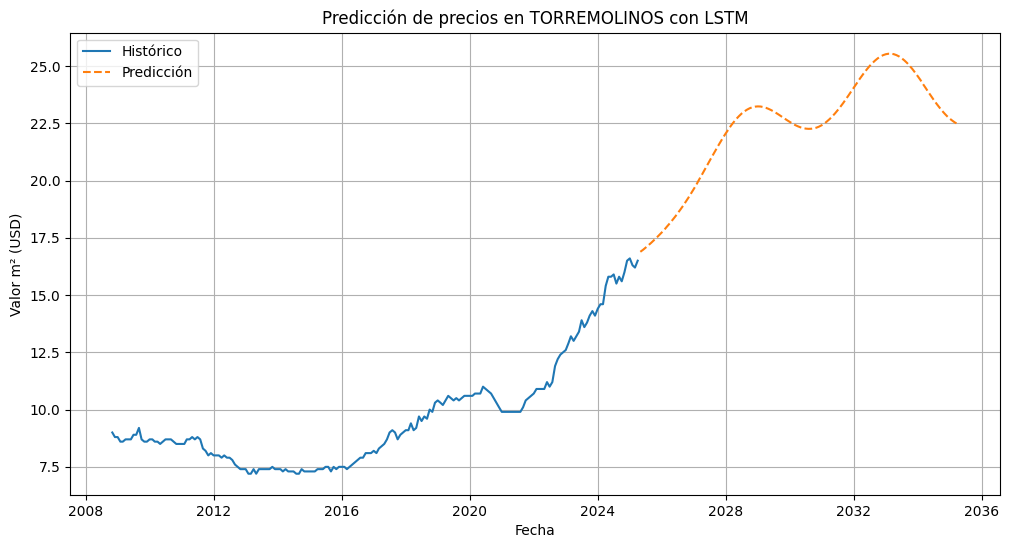

2025-05: $16.89
2025-06: $16.98
2025-07: $17.07
2025-08: $17.17
2025-09: $17.28
2025-10: $17.39
2025-11: $17.50
2025-12: $17.61
2026-01: $17.73
2026-02: $17.86
2026-03: $17.99
2026-04: $18.13
2026-05: $18.27
2026-06: $18.42
2026-07: $18.57
2026-08: $18.73
2026-09: $18.90
2026-10: $19.07
2026-11: $19.25
2026-12: $19.44
2027-01: $19.63
2027-02: $19.83
2027-03: $20.03
2027-04: $20.23
2027-05: $20.44
2027-06: $20.65
2027-07: $20.86
2027-08: $21.07
2027-09: $21.28
2027-10: $21.48
2027-11: $21.68
2027-12: $21.87
2028-01: $22.06
2028-02: $22.23
2028-03: $22.40
2028-04: $22.55
2028-05: $22.69
2028-06: $22.82
2028-07: $22.93
2028-08: $23.02
2028-09: $23.10
2028-10: $23.16
2028-11: $23.20
2028-12: $23.23
2029-01: $23.24
2029-02: $23.23
2029-03: $23.21
2029-04: $23.18
2029-05: $23.13
2029-06: $23.08
2029-07: $23.01
2029-08: $22.94
2029-09: $22.87
2029-10: $22.79
2029-11: $22.71
2029-12: $22.63
2030-01: $22.56
2030-02: $22.49
2030-03: $22.42
2030-04: $22.37
2030-05: $22.32
2030-06: $22.29
2030-07:

In [8]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'TORREMOLINOS'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [9]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_torremolinos.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_torremolinos.xlsx'")

Predicciones exportadas a 'predicciones_torremolinos.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18220\3823339618.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


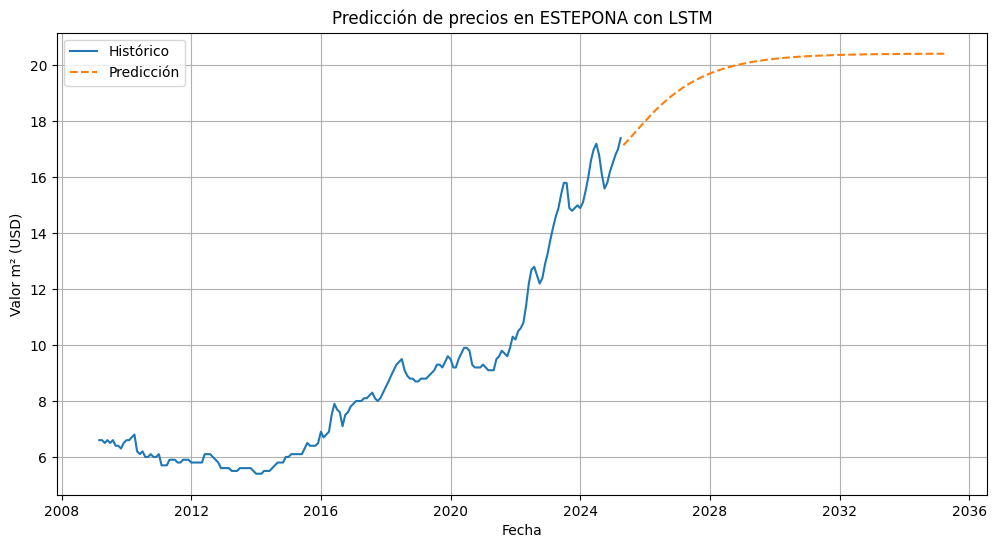

2025-05: $17.15
2025-06: $17.25
2025-07: $17.36
2025-08: $17.46
2025-09: $17.57
2025-10: $17.68
2025-11: $17.79
2025-12: $17.90
2026-01: $18.00
2026-02: $18.11
2026-03: $18.21
2026-04: $18.31
2026-05: $18.41
2026-06: $18.50
2026-07: $18.59
2026-08: $18.68
2026-09: $18.76
2026-10: $18.84
2026-11: $18.92
2026-12: $19.00
2027-01: $19.07
2027-02: $19.14
2027-03: $19.20
2027-04: $19.26
2027-05: $19.32
2027-06: $19.38
2027-07: $19.44
2027-08: $19.49
2027-09: $19.54
2027-10: $19.58
2027-11: $19.63
2027-12: $19.67
2028-01: $19.71
2028-02: $19.75
2028-03: $19.78
2028-04: $19.82
2028-05: $19.85
2028-06: $19.88
2028-07: $19.91
2028-08: $19.94
2028-09: $19.97
2028-10: $19.99
2028-11: $20.01
2028-12: $20.04
2029-01: $20.06
2029-02: $20.08
2029-03: $20.10
2029-04: $20.11
2029-05: $20.13
2029-06: $20.15
2029-07: $20.16
2029-08: $20.18
2029-09: $20.19
2029-10: $20.20
2029-11: $20.21
2029-12: $20.23
2030-01: $20.24
2030-02: $20.25
2030-03: $20.26
2030-04: $20.27
2030-05: $20.27
2030-06: $20.28
2030-07:

In [10]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'ESTEPONA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [11]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_estepona.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_estepona.xlsx'")

Predicciones exportadas a 'predicciones_estepona.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18220\302590312.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


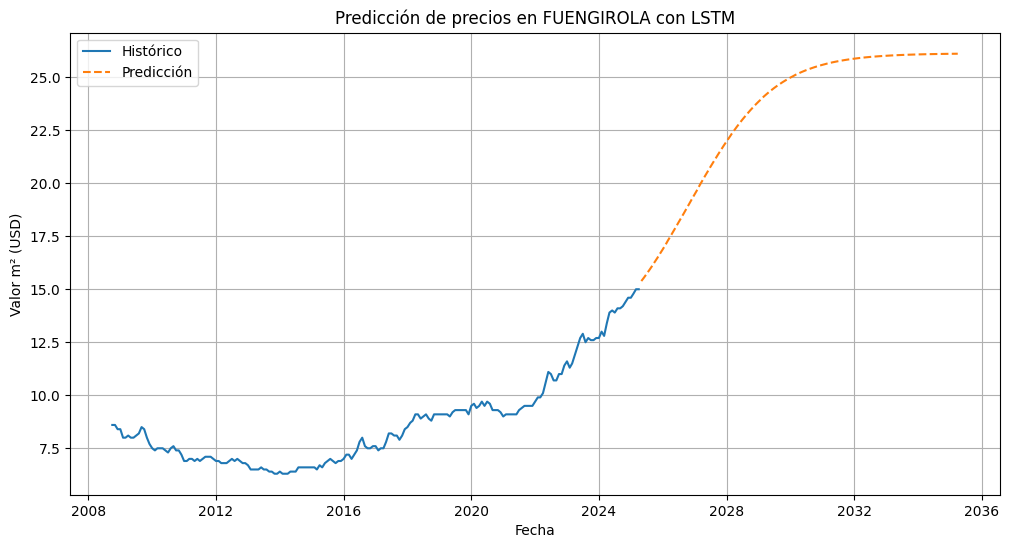

2025-05: $15.39
2025-06: $15.55
2025-07: $15.73
2025-08: $15.91
2025-09: $16.09
2025-10: $16.29
2025-11: $16.48
2025-12: $16.68
2026-01: $16.88
2026-02: $17.09
2026-03: $17.30
2026-04: $17.51
2026-05: $17.72
2026-06: $17.94
2026-07: $18.15
2026-08: $18.37
2026-09: $18.59
2026-10: $18.81
2026-11: $19.03
2026-12: $19.26
2027-01: $19.48
2027-02: $19.70
2027-03: $19.92
2027-04: $20.13
2027-05: $20.35
2027-06: $20.56
2027-07: $20.77
2027-08: $20.98
2027-09: $21.19
2027-10: $21.39
2027-11: $21.59
2027-12: $21.78
2028-01: $21.97
2028-02: $22.15
2028-03: $22.33
2028-04: $22.51
2028-05: $22.68
2028-06: $22.84
2028-07: $23.00
2028-08: $23.16
2028-09: $23.30
2028-10: $23.45
2028-11: $23.59
2028-12: $23.72
2029-01: $23.84
2029-02: $23.97
2029-03: $24.08
2029-04: $24.19
2029-05: $24.30
2029-06: $24.40
2029-07: $24.50
2029-08: $24.59
2029-09: $24.68
2029-10: $24.76
2029-11: $24.84
2029-12: $24.91
2030-01: $24.98
2030-02: $25.05
2030-03: $25.11
2030-04: $25.17
2030-05: $25.23
2030-06: $25.28
2030-07:

In [12]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'FUENGIROLA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [13]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_estepona.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_estepona.xlsx'")

Predicciones exportadas a 'predicciones_estepona.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9372\302590312.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


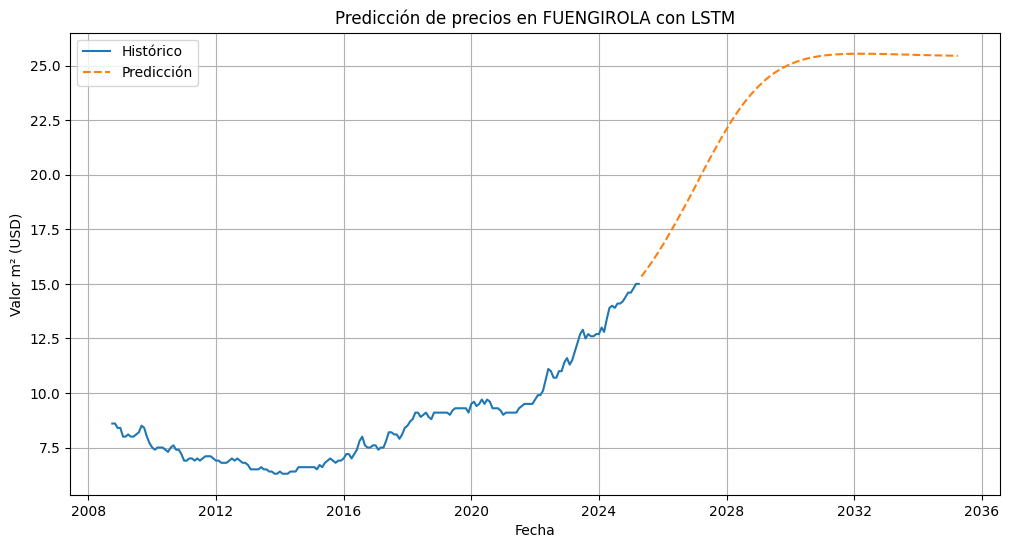

2025-05: $15.34
2025-06: $15.50
2025-07: $15.67
2025-08: $15.84
2025-09: $16.02
2025-10: $16.20
2025-11: $16.39
2025-12: $16.58
2026-01: $16.78
2026-02: $16.98
2026-03: $17.18
2026-04: $17.39
2026-05: $17.61
2026-06: $17.82
2026-07: $18.04
2026-08: $18.26
2026-09: $18.49
2026-10: $18.72
2026-11: $18.95
2026-12: $19.18
2027-01: $19.41
2027-02: $19.64
2027-03: $19.87
2027-04: $20.11
2027-05: $20.34
2027-06: $20.57
2027-07: $20.80
2027-08: $21.02
2027-09: $21.24
2027-10: $21.46
2027-11: $21.68
2027-12: $21.89
2028-01: $22.09
2028-02: $22.29
2028-03: $22.49
2028-04: $22.67
2028-05: $22.85
2028-06: $23.03
2028-07: $23.20
2028-08: $23.36
2028-09: $23.51
2028-10: $23.66
2028-11: $23.80
2028-12: $23.93
2029-01: $24.05
2029-02: $24.17
2029-03: $24.28
2029-04: $24.39
2029-05: $24.49
2029-06: $24.58
2029-07: $24.67
2029-08: $24.75
2029-09: $24.82
2029-10: $24.89
2029-11: $24.96
2029-12: $25.02
2030-01: $25.07
2030-02: $25.12
2030-03: $25.17
2030-04: $25.21
2030-05: $25.25
2030-06: $25.29
2030-07:

In [5]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("prueba lstm.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'FUENGIROLA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")

In [6]:
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_fuengirola.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_fuengirola.xlsx'")

Predicciones exportadas a 'predicciones_fuengirola.xlsx'


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9372\3389363792.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


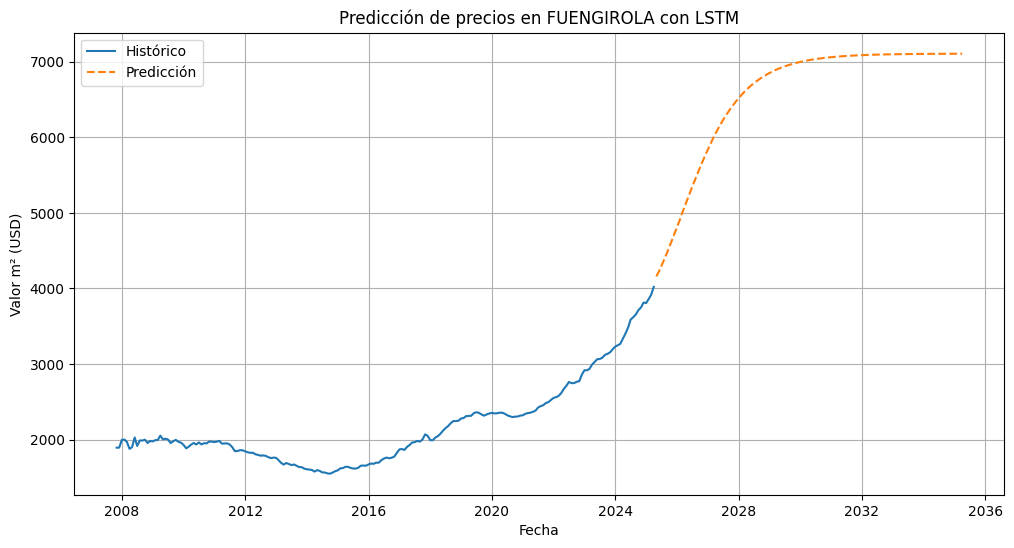

2025-05: $4159.49
2025-06: $4225.96
2025-07: $4300.62
2025-08: $4379.76
2025-09: $4462.16
2025-10: $4547.01
2025-11: $4633.75
2025-12: $4721.93
2026-01: $4811.14
2026-02: $4901.02
2026-03: $4991.22
2026-04: $5081.37
2026-05: $5171.14
2026-06: $5260.17
2026-07: $5348.13
2026-08: $5434.71
2026-09: $5519.59
2026-10: $5602.51
2026-11: $5683.22
2026-12: $5761.50
2027-01: $5837.16
2027-02: $5910.07
2027-03: $5980.11
2027-04: $6047.19
2027-05: $6111.28
2027-06: $6172.34
2027-07: $6230.40
2027-08: $6285.48
2027-09: $6337.64
2027-10: $6386.93
2027-11: $6433.44
2027-12: $6477.27
2028-01: $6518.52
2028-02: $6557.28
2028-03: $6593.68
2028-04: $6627.82
2028-05: $6659.82
2028-06: $6689.78
2028-07: $6717.83
2028-08: $6744.06
2028-09: $6768.58
2028-10: $6791.49
2028-11: $6812.89
2028-12: $6832.88
2029-01: $6851.53
2029-02: $6868.94
2029-03: $6885.17
2029-04: $6900.32
2029-05: $6914.45
2029-06: $6927.62
2029-07: $6939.90
2029-08: $6951.35
2029-09: $6962.02
2029-10: $6971.97
2029-11: $6981.24
2029-12: $

In [8]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'FUENGIROLA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")
    df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_compra_fuengirola.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_fuengirola.xlsx'")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9372\3190805384.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


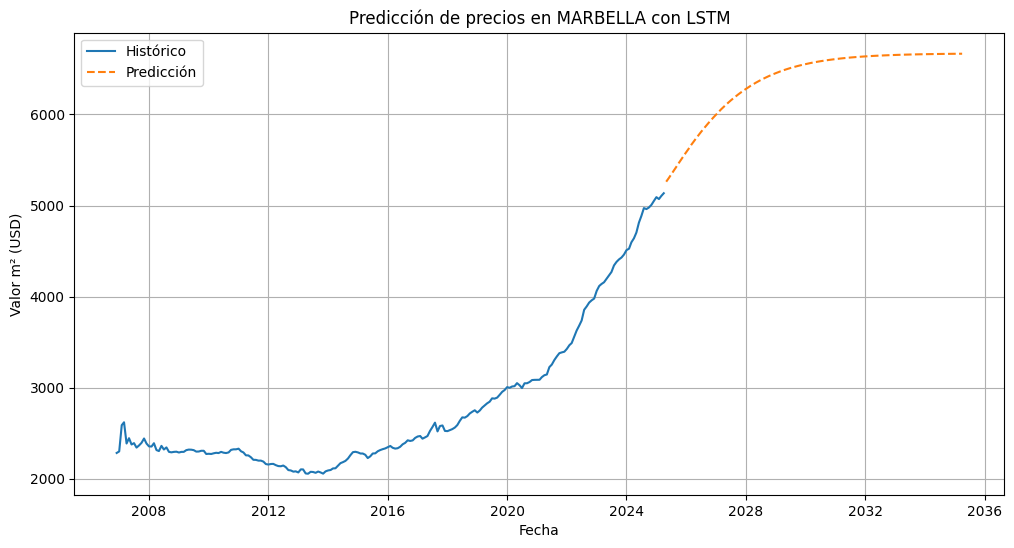

2025-05: $5261.76
2025-06: $5300.59
2025-07: $5341.15
2025-08: $5382.40
2025-09: $5423.82
2025-10: $5465.07
2025-11: $5505.94
2025-12: $5546.29
2026-01: $5586.01
2026-02: $5625.03
2026-03: $5663.29
2026-04: $5700.75
2026-05: $5737.38
2026-06: $5773.14
2026-07: $5808.03
2026-08: $5842.01
2026-09: $5875.08
2026-10: $5907.23
2026-11: $5938.45
2026-12: $5968.73
2027-01: $5998.09
2027-02: $6026.51
2027-03: $6054.01
2027-04: $6080.58
2027-05: $6106.25
2027-06: $6131.01
2027-07: $6154.89
2027-08: $6177.90
2027-09: $6200.05
2027-10: $6221.36
2027-11: $6241.85
2027-12: $6261.53
2028-01: $6280.43
2028-02: $6298.57
2028-03: $6315.97
2028-04: $6332.65
2028-05: $6348.62
2028-06: $6363.92
2028-07: $6378.56
2028-08: $6392.57
2028-09: $6405.97
2028-10: $6418.77
2028-11: $6431.00
2028-12: $6442.69
2029-01: $6453.84
2029-02: $6464.49
2029-03: $6474.64
2029-04: $6484.33
2029-05: $6493.57
2029-06: $6502.38
2029-07: $6510.77
2029-08: $6518.76
2029-09: $6526.38
2029-10: $6533.63
2029-11: $6540.54
2029-12: $

In [9]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'MARBELLA'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")
    df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_compra_marbella.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_marbella.xlsx'")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9372\1280725624.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


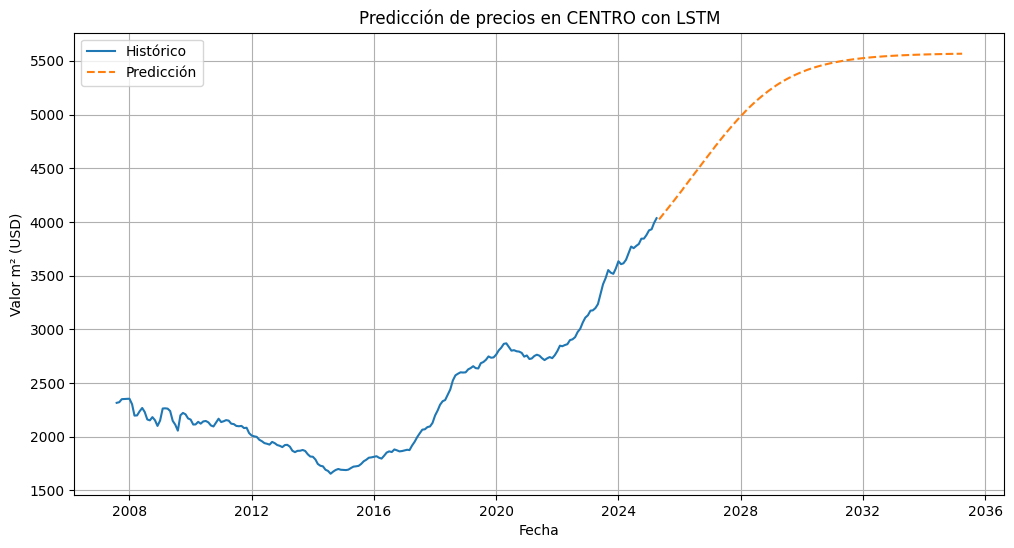

2025-05: $4023.88
2025-06: $4054.10
2025-07: $4084.13
2025-08: $4114.11
2025-09: $4144.15
2025-10: $4174.31
2025-11: $4204.64
2025-12: $4235.16
2026-01: $4265.86
2026-02: $4296.74
2026-03: $4327.78
2026-04: $4358.95
2026-05: $4390.24
2026-06: $4421.61
2026-07: $4453.02
2026-08: $4484.46
2026-09: $4515.87
2026-10: $4547.22
2026-11: $4578.47
2026-12: $4609.58
2027-01: $4640.51
2027-02: $4671.22
2027-03: $4701.67
2027-04: $4731.82
2027-05: $4761.62
2027-06: $4791.04
2027-07: $4820.04
2027-08: $4848.58
2027-09: $4876.63
2027-10: $4904.14
2027-11: $4931.10
2027-12: $4957.47
2028-01: $4983.23
2028-02: $5008.35
2028-03: $5032.80
2028-04: $5056.59
2028-05: $5079.67
2028-06: $5102.06
2028-07: $5123.73
2028-08: $5144.67
2028-09: $5164.90
2028-10: $5184.40
2028-11: $5203.17
2028-12: $5221.23
2029-01: $5238.57
2029-02: $5255.21
2029-03: $5271.16
2029-04: $5286.42
2029-05: $5301.02
2029-06: $5314.96
2029-07: $5328.27
2029-08: $5340.96
2029-09: $5353.05
2029-10: $5364.56
2029-11: $5375.51
2029-12: $

In [10]:
# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'CENTRO'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias para LSTM ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 120 meses
X, y = create_sequences(scaled_data, window_size)

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Ajustar dimensiones
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Entrenar ---
model.fit(X, y, epochs=100, batch_size=16, verbose=0)

# --- 6. Predicción a futuro ---
last_sequence = scaled_data[-window_size:]
future_preds = []

n_months = 120  # Predecir los próximos 2 años

for _ in range(n_months):
    pred_input = last_sequence.reshape((1, window_size, 1))
    pred = model.predict(pred_input, verbose=0)[0][0]
    future_preds.append(pred)
    last_sequence = np.append(last_sequence[1:], [[pred]], axis=0)

# Desescalar resultados
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1,1)).flatten()

# --- 7. Graficar ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM')
plt.legend()
plt.grid()
plt.show()

# Imprimir resultados
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")
    df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})

# Guardar a Excel
df_predicciones.to_excel('predicciones_compra_centro.xlsx', index=False)

print("Predicciones exportadas a 'predicciones_centro.xlsx'")

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [19]:


# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col= False) 

# --- 1. Cargar y preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'CENTRO'
df_area = df[df['AREA'] == area].copy()

# Reindexar para evitar problemas de huecos en fechas
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')

# --- 2. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 3. Crear secuencias ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 144  # 12 años de historial
X, y = create_sequences(scaled_data, window_size)

# Ajustar dimensiones para LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 4. Construir modelo LSTM ---
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- 5. Entrenamiento con validación y early stopping ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(
    X, y,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# --- 6. Predicción a futuro autorregresiva ---
n_months = 120  # Predecir 10 años más
future_preds = []

last_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

for _ in range(n_months):
    next_pred = model.predict(last_sequence, verbose=0)
    future_preds.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], [[next_pred]], axis=1)

# Invertir escala
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# --- 7. (Opcional) Visualización ---
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(len(series)), scaler.inverse_transform(scaled_data), label='Histórico')
plt.plot(range(len(series), len(series) + n_months), future_preds, label='Predicción futura')
plt.legend()
plt.title("Predicción de Serie Temporal con LSTM")
plt.xlabel("Mes")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

Epoch 1/200


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9372\3121450378.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).fillna(method='ffill')
c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - loss: 0.2753 - val_loss: 0.4116
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.1321 - val_loss: 0.1124
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0299 - val_loss: 0.0017
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0298 - val_loss: 0.0186
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0348 - val_loss: 1.1654e-04
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.0142 - val_loss: 0.0236
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0076 - val_loss: 0.0625
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0161 - val_loss: 0.0775
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 0.0206 - val_loss: 0.0671
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0165 - val_loss: 0.0423
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 0.0086 - val_loss: 0.0189
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - loss: 0.0068 - va

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 4 dimension(s)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- 1. Cargar y limpiar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col=False)

# --- 2. Preparar datos ---
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# Filtrar por área
area = 'CENTRO'
df_area = df[df['AREA'] == area].copy()

# Reindexar mensualmente y rellenar faltantes
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).ffill()

# --- 3. Normalizar ---
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[['COSTE/M2']])

# --- 4. Crear secuencias ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 144  # 12 años de historial mensual
X, y = create_sequences(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], 1))

# --- 5. Construir modelo LSTM mejorado ---
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1))

# --- 6. Entrenar modelo con validación ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X, y, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# --- 7. Predicción futura autorregresiva ---
n_months = 120  # Predecir próximos 10 años
future_preds = []
last_sequence = scaled_data[-window_size:].reshape(1, window_size, 1)

for _ in range(n_months):
    next_pred = model.predict(last_sequence, verbose=0)
    future_preds.append(next_pred[0, 0])
    next_pred_reshaped = next_pred.reshape(1, 1, 1)
    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_pred_reshaped], axis=1)

# Desescalar predicciones
future_preds_real = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1)).flatten()

# --- 8. Graficar resultados ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')
plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM mejorado')
plt.legend()
plt.grid(
plt.show()




c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: You must call `compile()` before using the model.

Epoch 1/200


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - loss: 0.4311 - val_loss: 0.3878
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0891 - val_loss: 0.0033
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0552 - val_loss: 0.0014
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - loss: 0.0530 - val_loss: 0.0330
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0189 - val_loss: 0.1032
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0226 - val_loss: 0.1507
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0310 - val_loss: 0.1588
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0302 - val_loss: 0.1359
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0200 - val_loss: 0.0958
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0113 - val_loss: 0.0587
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0117 - val_loss: 0.0353
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0097 - val_lo

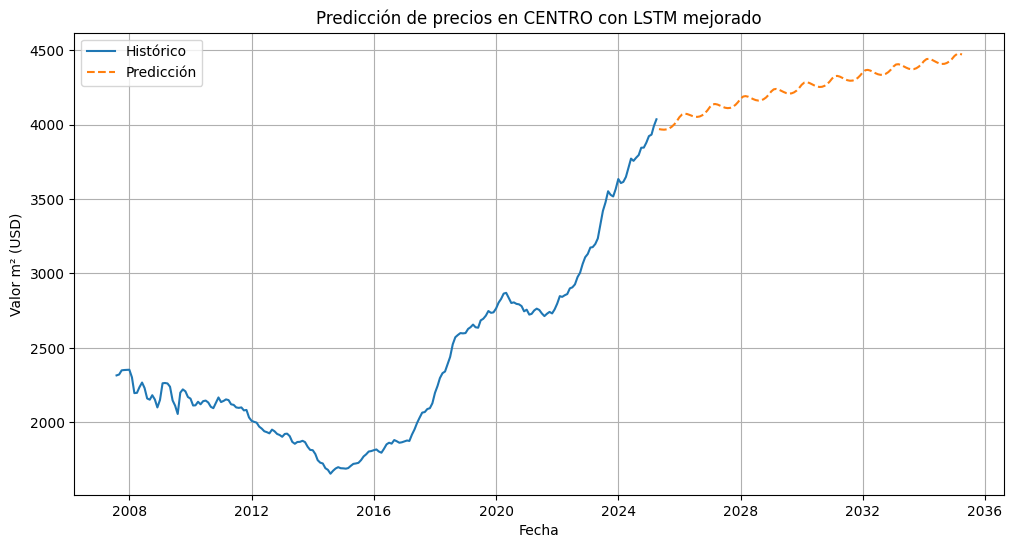

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# --- 1. Cargar y preparar datos ---
df = pd.read_excel("EVOLUTIVO_COMPRA.xlsx", index_col=False)
df['MES'] = pd.to_datetime(df['MES'])
df = df.sort_values(by='MES')

# --- 2. Filtrar por área ---
area = 'CENTRO'
df_area = df[df['AREA'] == area].copy()

# --- 3. Reindexar mensual ---
df_area = df_area.set_index('MES').resample('MS').mean(numeric_only=True).ffill()

# --- 4. Agregar características temporales ---
df_area['mes'] = df_area.index.month
df_area['año'] = df_area.index.year

# --- 5. Normalización ---
features = ['COSTE/M2', 'mes', 'año']  # Puedes agregar aquí más columnas como 'IPC', 'TIPO_INTERES'
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_area[features])

# --- 6. Crear secuencias ---
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size][0])  # predicción solo de COSTE/M2
    return np.array(X), np.array(y)

window_size = 144
X, y = create_sequences(scaled_data, window_size)
X = X.reshape((X.shape[0], X.shape[1], len(features)))  # multivariable

# --- 7. Modelo LSTM mejorado ---
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# --- 8. Entrenamiento con validación ---
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X, y, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# --- 9. Predicción autoregresiva ---
n_months = 120  # 10 años
future_preds = []
last_sequence = scaled_data[-window_size:].copy().reshape(1, window_size, len(features))

for i in range(n_months):
    next_pred = model.predict(last_sequence, verbose=0)[0, 0]
    future_preds.append(next_pred)

    # crear próxima entrada con mes/año actualizados
    next_month = (df_area.index[-1] + pd.DateOffset(months=i+1))
    mes = (next_month.month - 1) / 11.0  # normalizado
    año = (next_month.year - df_area['año'].min()) / (df_area['año'].max() - df_area['año'].min())  # normalizado

    next_features = np.zeros((1, 1, len(features)))
    next_features[0, 0, 0] = next_pred  # predicción COSTE/M2
    next_features[0, 0, 1] = mes
    next_features[0, 0, 2] = año

    last_sequence = np.concatenate([last_sequence[:, 1:, :], next_features], axis=1)

# --- 10. Desnormalizar ---
preds_padded = np.zeros((len(future_preds), len(features)))
preds_padded[:, 0] = future_preds
future_preds_real = scaler.inverse_transform(preds_padded)[:, 0]

# --- 11. Visualización ---
future_dates = pd.date_range(start=df_area.index[-1] + pd.DateOffset(months=1), periods=n_months, freq='MS')

plt.figure(figsize=(12, 6))
plt.plot(df_area.index, df_area['COSTE/M2'], label='Histórico')
plt.plot(future_dates, future_preds_real, label='Predicción', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Valor m² (USD)')
plt.title(f'Predicción de precios en {area} con LSTM mejorado')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# --- 9. Guardar resultados ---
df_predicciones = pd.DataFrame({
    'Fecha': future_dates,
    'Valor_m2_Predicho': future_preds_real
})
df_predicciones.to_excel('predicciones_compra_centro.xlsx', index=False)
print("Predicciones exportadas a 'predicciones_compra_centro.xlsx'")

# --- 10. Imprimir resumen ---
for date, val in zip(future_dates, future_preds_real):
    print(f"{date.strftime('%Y-%m')}: ${val:.2f}")